In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_csv('ELweather.csv')
#df.describe()

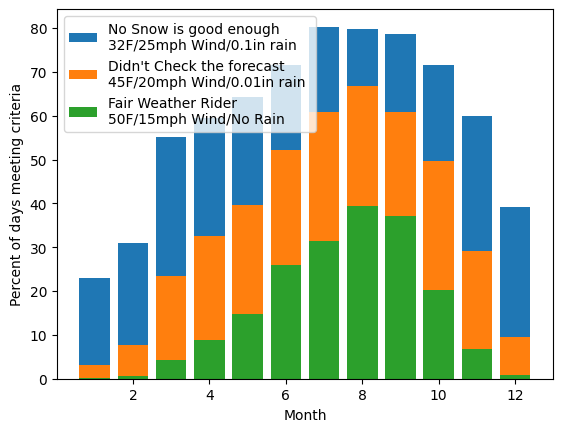

In [62]:
criteria = {
    "No Snow is good enough\n32F/25mph Wind/0.1in rain" : (32,0.1,25),
    "Didn't Check the forecast\n45F/20mph Wind/0.01in rain " : (40,0.01, 20),
    "Fair Weather Rider\n50F/15mph Wind/No Rain" : (50, 0, 15),
    }

riding_days = {criteria_name: np.zeros(12) for criteria_name in criteria.keys()}

for m in range(12):
    mdf = df[df['month'] == m+1]
    count = len(mdf)
        
    for criteria_name, (min_temp, max_rain, max_wind) in criteria.items():
        good_days = len(mdf[(mdf['atmp_max'] >= min_temp) & (mdf['pcpn'] <= max_rain) & (mdf['wspd_max'] <= max_wind)])
        riding_days[criteria_name][m] = good_days / count

for criteria_name in criteria.keys():
    # smooth the data
    riding_days[criteria_name] = pd.Series(riding_days[criteria_name])
    plt.bar(np.arange(12)+1,riding_days[criteria_name]*100, label=criteria_name, alpha=1)


plt.legend(loc='upper left')
plt.xlabel('Month')
plt.ylabel('Percent of days meeting criteria')
plt.show()

In [ ]:
riding

array([0.03703704, 0.14814815, 0.11111111, 0.07407407, 0.07407407,
       0.11111111, 0.07407407, 0.03703704, 0.        , 0.03703704,
       0.11111111, 0.14814815, 0.03703704, 0.        , 0.        ,
       0.        , 0.        , 0.03703704, 0.        , 0.03703704,
       0.03703704, 0.07407407, 0.03703704, 0.        , 0.        ,
       0.07407407, 0.11111111, 0.03703704, 0.07407407, 0.03703704,
       0.03703704, 0.        , 0.        , 0.        , 0.03703704,
       0.        , 0.        , 0.07407407, 0.        , 0.03703704,
       0.11111111, 0.07407407, 0.03703704, 0.        , 0.        ,
       0.        , 0.03703704, 0.07407407, 0.11111111, 0.11111111,
       0.14814815, 0.07407407, 0.11111111, 0.07407407, 0.11111111,
       0.14814815, 0.11111111, 0.22222222, 0.22222222, 0.28571429,
       0.14814815, 0.03703704, 0.07407407, 0.03703704, 0.14814815,
       0.18518519, 0.14814815, 0.22222222, 0.25925926, 0.25925926,
       0.2962963 , 0.33333333, 0.2962963 , 0.33333333, 0.29629

In [ ]:
riding.mean()

0.616721823005976